###  This jupyter file is using for analysis so, all needed methods from BCI interface, No one should write any function existing in BCI interface, if you need new feature write it in BCI interface for relavinte topic then import and use it, this file is using for logic and analysis **ONLY**.

### Import All Needed Class

In [80]:
from BCInterface.Helpers import helper
from BCInterface.Visualization.Visualization import graphs
from BCInterface.Preprocessing.DataPrepare import DataPrepare
from BCInterface.Preprocessing.files_manager import Filesmanager
from mainproccess import Process

import glob

### Some users configuations and files, trails, etc...

In [81]:
number_sec = 5           # sellect example time
path_dir_= 'D:/Graduation Project/EEG-SSVEP-DataSet/5_S/'
File_regexp= 'U0000*.csv'

### Get Data from files, and prepare it.

In [90]:
prepare = DataPrepare()
data = prepare.get_dataFromFiles(glob.glob(path_dir_ + File_regexp),concate=True)
# Todo
# 1- 
# 2- 
trials_list = prepare.Extraxt_trials(data, number_sec)     # divid the data to list of data to anla.
Labels = data['Label'] #.drop('Label',axis=1)
trials_list[8]

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,Label
5120,4210.897436,4172.307692,4103.461538,4111.538461,4131.923077,4192.179487,4168.333333,4131.538461,4184.358974,4221.794872,3984.615384,4159.871795,4176.410256,4092.564102,12.0
5121,4217.051282,4167.948718,4108.205128,4110.769231,4152.820513,4171.410256,4169.743590,4134.615384,4198.333333,4193.333333,3990.128205,4165.512820,4173.846154,4091.153846,12.0
5122,4202.307692,4171.410256,4098.846153,4104.615384,4123.846154,4175.897436,4167.307692,4125.000000,4178.717949,4193.974359,3992.692307,4152.307692,4159.487179,4090.512820,12.0
5123,4169.871795,4148.974359,4068.076923,4082.948718,4106.282051,4178.076923,4142.564102,4103.717948,4145.641025,4207.692308,3971.410256,4117.564102,4134.871795,4092.564102,12.0
5124,4153.461538,4117.564102,4044.102564,4051.666666,4097.435897,4158.205128,4128.205128,4101.282051,4141.410256,4163.076923,3940.641025,4091.025641,4113.846154,4094.487179,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5755,4080.384615,4095.512820,4152.435897,4132.307692,4068.974359,4056.538461,4050.512820,4108.461538,4068.846153,4066.923077,4185.769231,4087.179487,4077.692307,4097.820512,12.0
5756,4093.846154,4106.153846,4157.564102,4133.205128,4071.153846,4065.384615,4058.205128,4114.102564,4080.384615,4071.538461,4177.820513,4093.076923,4095.000000,4096.410256,12.0
5757,4094.358974,4106.794872,4151.153846,4123.076923,4075.897436,4072.692307,4060.897435,4115.256410,4083.589743,4088.461538,4175.000000,4091.666666,4101.923077,4093.589743,12.0
5758,4087.564102,4106.923077,4152.820513,4134.871795,4084.102564,4071.282051,4053.717948,4106.538461,4075.897436,4092.307692,4193.589743,4095.641025,4102.051282,4096.923077,12.0


# Trial Numbers

In [91]:
Trial_number = 8

### Time Domain Visualization, before CAR

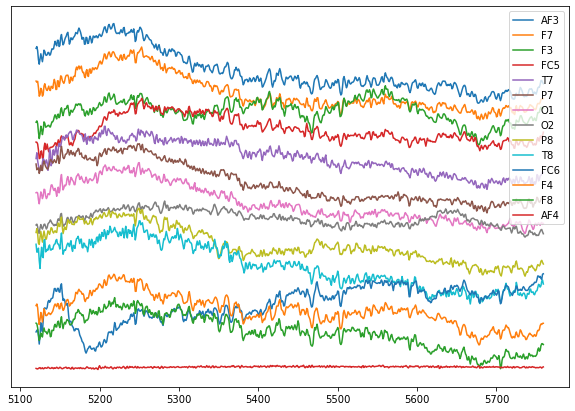

In [84]:
graphs.time_vis(trials_list[Trial_number])

### Calcualte CAR 

In [85]:
data_car = helper.CAR(data.copy())
trials_list_after_CAR = prepare.Extraxt_trials(data_car, number_sec)
# freq, power , label = helper.welch(trials_list_after_CAR[Trial_number].copy(),True, True)

### Time Domain Visualization, after CAR

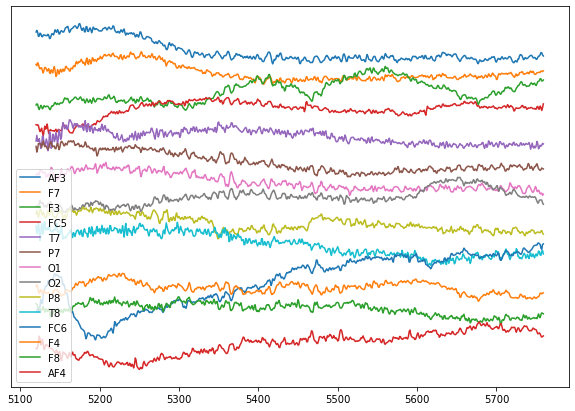

In [86]:
graphs.time_vis(trials_list_after_CAR[Trial_number])

### BandPass filter with freq response.

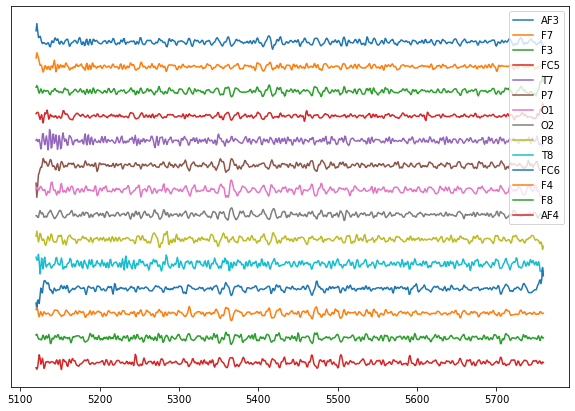

In [87]:
data_filter = helper.butter_band_filter(data_car.copy(),5, 40)
trials_list_after_filter = prepare.Extraxt_trials(data_filter, number_sec)
graphs.time_vis(trials_list_after_filter[Trial_number])

### Power using welch.

In [74]:
freq, power, label = helper.welch(trials_list_after_filter[Trial_number].copy(),True, True)
print(label)
label= Labels[Trial_number*128*5]
label

12.0


12.0

### Power vs. Frequency visualization

len of f 14


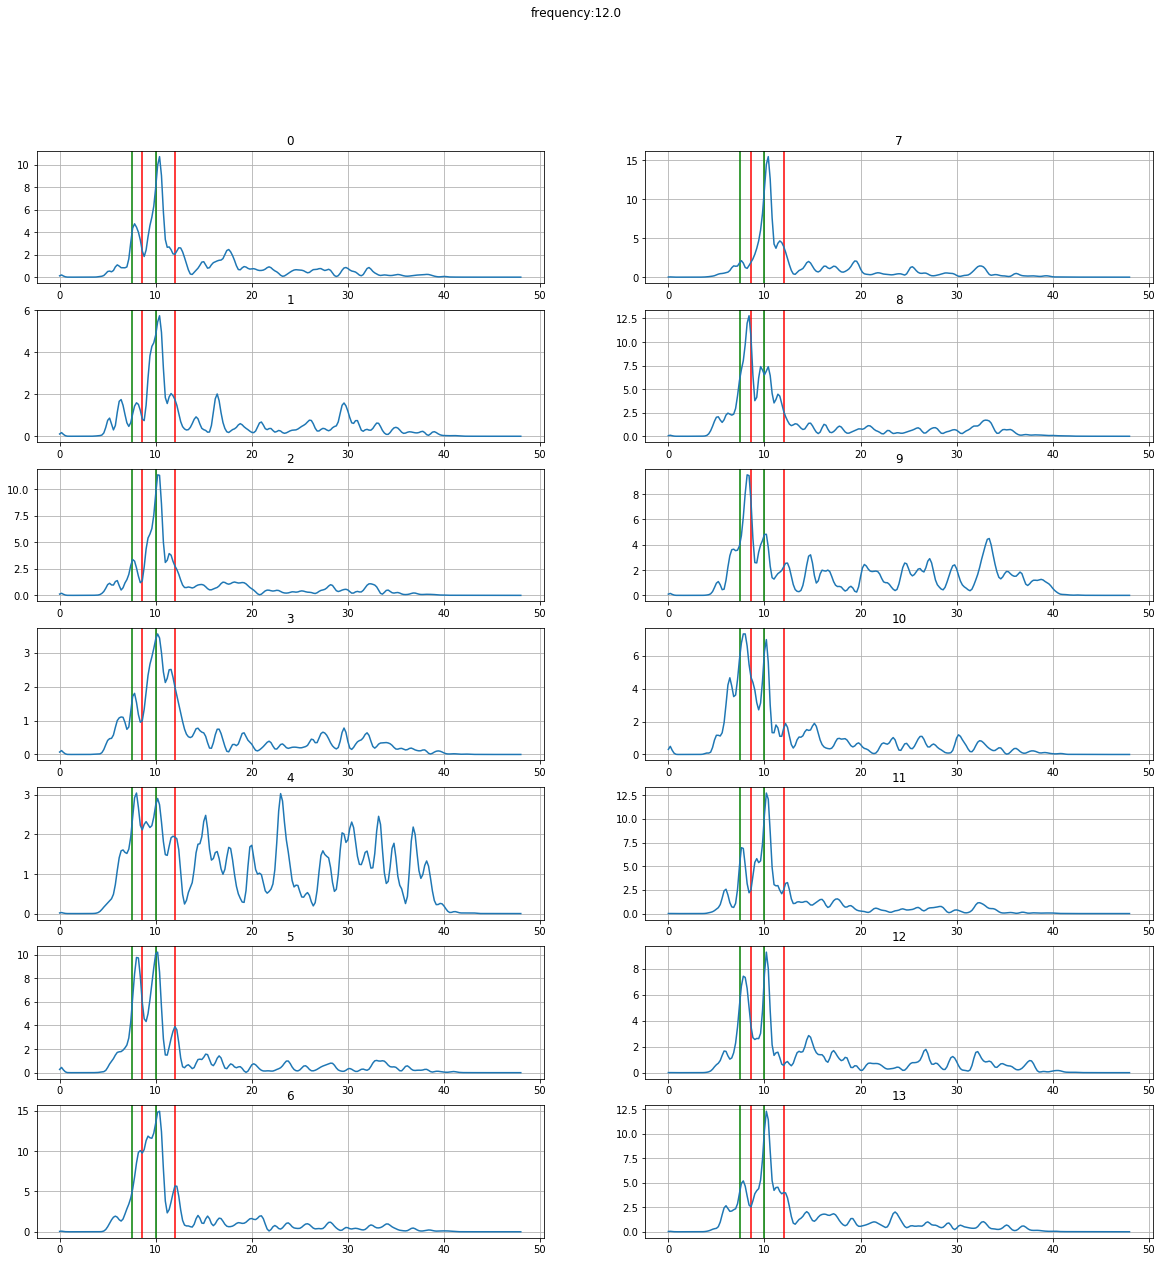

In [75]:
graphs.welch_vis(freq, power,label,[0,1,2,3,4,5,6,7,8,9,10,11,12,13])

### Extract Features 

### Prepare data for train

In [78]:
prepare =  DataPrepare()
data = prepare.get_dataFromFiles(['D:/Graduation Project/EEG-SSVEP-DataSet/5_S/U0000ai.csv'], concate=True)

### Train

In [79]:
process = Process()
process.train(data)

ValueError: n_components=35 must be between 0 and min(n_samples, n_features)=16 with svd_solver='full'

### Predict

In [ ]:
 x_train, x_test, y_train, y_test = self.encod_split(Feature, Labels,.8)

self.pca.fit(x_train)
x_train = pd.DataFrame(self.pca.transform(x_train))
x_test  = pd.DataFrame(self.pca.transform(x_test))

self.model = Pipeline([
    ("scaler", Normalizer(norm='l1')),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, gamma=.6, C=25))
])

self.model.fit(x_train,y_train)

print(self.model.score(x_train, y_train))
print(self.model.score(x_test, y_test))
print('traing shape=', x_train.shape)
print('testing shape=', x_test.shape)

### All needed modules can import or use it as you want.